# Authors: 
         Rutvik Pansare       
         Praksha maheshwari
         Vishal Phaugat

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector

In [2]:
# connection with database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="rutu12345",
  database="project"
)
# Query to extract data from the database
query = "SELECT * FROM project.crime_data;"
df = pd.read_sql(query,mydb)

mydb.close() #close the connection



In [3]:
# convert date string to datetime format
from datetime import datetime
year_query = df.copy()
dates =[]
year_query['CMPLNT_FR_DT'] = pd.to_datetime(year_query['CMPLNT_FR_DT'])
year_query['YEAR'] = pd. DatetimeIndex(year_query['CMPLNT_FR_DT']).year

In [4]:
df = pd.read_csv("clean.csv")

In [5]:
df.head()

,Unnamed: 0,CMPLNT_FR_DT,CMPLNT_FR_TM,SUSP_AGE_GROUP,Latitude,Longitude,YEAR,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,...,SYNAGOGUE,TAXI (LIVERY LICENSED),BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,FELONY,MISDEMEANOR,VIOLATION
0,0,2,18,0,40.576238,-73.959504,2012,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,1,0,2,40.858249,-73.902349,2016,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,2,1,17,0,40.804013,-73.878332,2010,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,3,11,20,2,40.675311,-73.966614,2017,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,4,7,14,1,40.654621,-73.952894,2015,1,0,1,...,0,0,0,1,0,0,0,0,1,0


In [1]:
dfMonth = year_query.CMPLNT_FR_DT.dt.month
year_query.groupby(dfMonth)['CMPLNT_NUM'].count().plot(kind='bar')
month_query = year_query.copy()
month_query['CMPLNT_FR_DT'] = month_query['CMPLNT_FR_DT'].dt.strftime('%y/%m')
vis1 = month_query.groupby(["CMPLNT_FR_DT"])['CMPLNT_NUM'].count().reset_index()

NameError: name 'year_query' is not defined

In [7]:
vis1['Total'] = vis1['CMPLNT_NUM']

In [8]:
vis1.drop("CMPLNT_NUM",axis = 1,inplace = True)


In [9]:

vis1.rename(columns = {"CMPLNT_FR_DT":"Dates"}, inplace = True)

In [10]:
vis1.set_index("Dates",inplace = True)

<AxesSubplot:xlabel='Dates'>

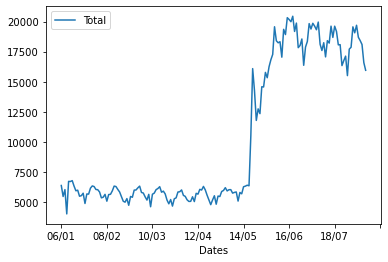

In [11]:
vis1.plot()

In [12]:

vis2 = year_query.groupby(["CMPLNT_FR_DT"])['CMPLNT_NUM'].count().reset_index()

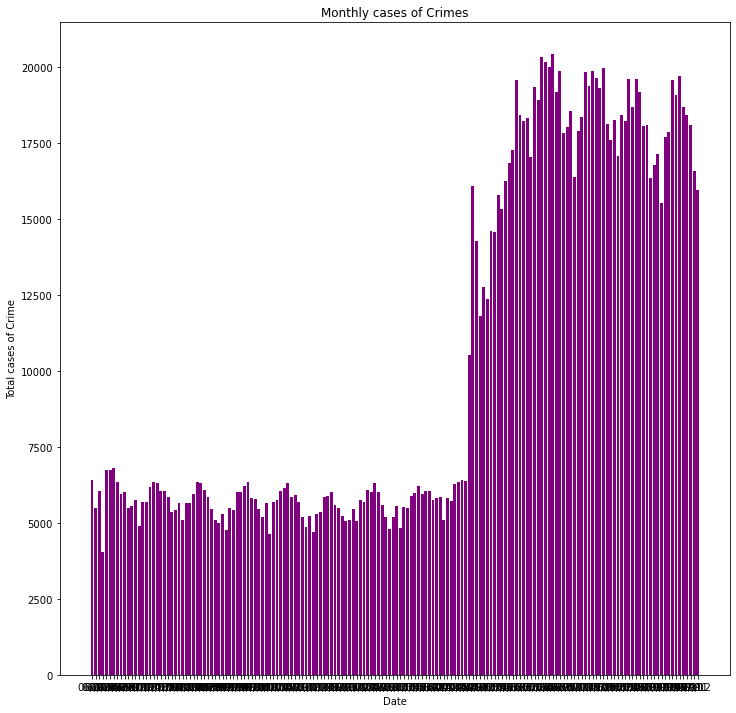

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(vis1.index.values,
       vis1.Total,
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Total cases of Crime",
       title="Monthly cases of Crimes")

plt.show()

<AxesSubplot:xlabel='CMPLNT_FR_DT'>

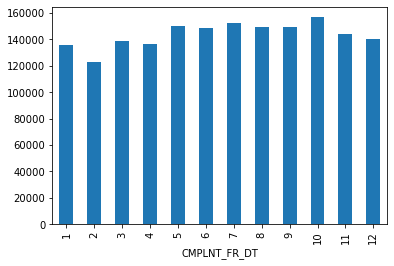

In [14]:
dfMonth = year_query.CMPLNT_FR_DT.dt.month
year_query.groupby(dfMonth)['CMPLNT_NUM'].count().plot(kind='bar')

In [15]:
from statsmodels.tsa.stattools import adfuller


In [16]:
test_result=adfuller(vis1['Total'])

In [17]:


def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adfuller_test(vis1['Total'])
vis1

ADF Test Statistic : -1.543355432091788
p-value : 0.5119655101085991
#Lags Used : 14
Number of Observations Used : 153
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


,Total
Dates,
06/01,6393
06/02,5481
06/03,6051
06/04,4035
06/05,6734
...,...
19/08,18694
19/09,18416
19/10,18095


In [19]:
vis1['Seasonal First Difference'] = vis1['Total'] - vis1['Total'].shift(12)

In [20]:
vis1

,Total,Seasonal First Difference
Dates,,
06/01,6393,NaN
06/02,5481,NaN
06/03,6051,NaN
06/04,4035,NaN
06/05,6734,NaN
...,...,...
19/08,18694,-479.0
19/09,18416,350.0
19/10,18095,14.0


In [21]:

## Again test dickey fuller test
adfuller_test(vis1['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.8444733975733318
p-value : 0.3586159429555039
#Lags Used : 2
Number of Observations Used : 153
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Dates'>

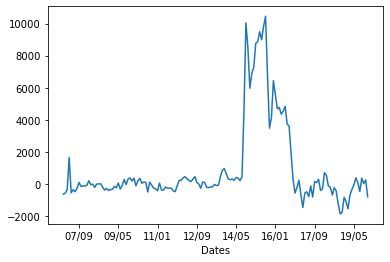

In [22]:
vis1['Seasonal First Difference'].plot()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [24]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model=ARIMA(vis1['Total'],order=(1,1,1))
model_fit=model.fit()

/Users/Rutvik/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/Rutvik/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and wi

In [26]:

import statsmodels.api as sm

In [27]:
model=sm.tsa.statespace.SARIMAX(vis1['Total'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
future_df = vis1.copy()

/Users/Rutvik/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/Rutvik/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/Rutvik/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0, 0.5, 'Number of cases')

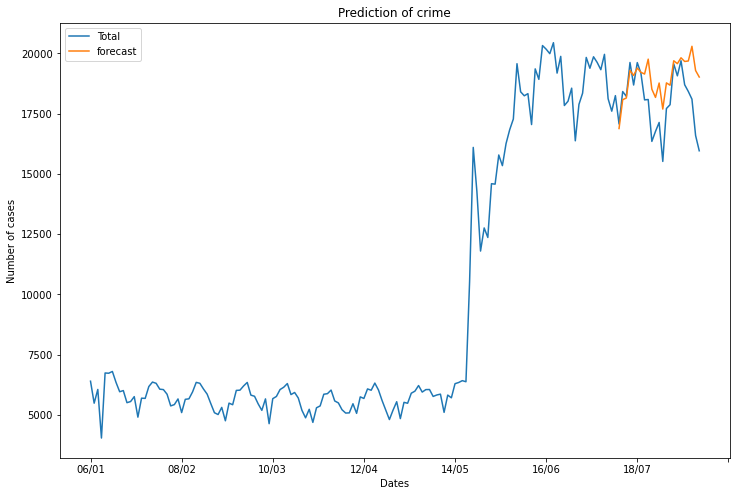

In [28]:
#predicting the crime values
future_df['forecast']=results.predict(start=145,end=167,dynamic=True)
future_df[['Total','forecast']].plot(figsize=(12,8))
plt.title('Prediction of crime')
plt.xlabel('Dates')
plt.ylabel('Number of cases')



Text(0, 0.5, 'Number of cases')

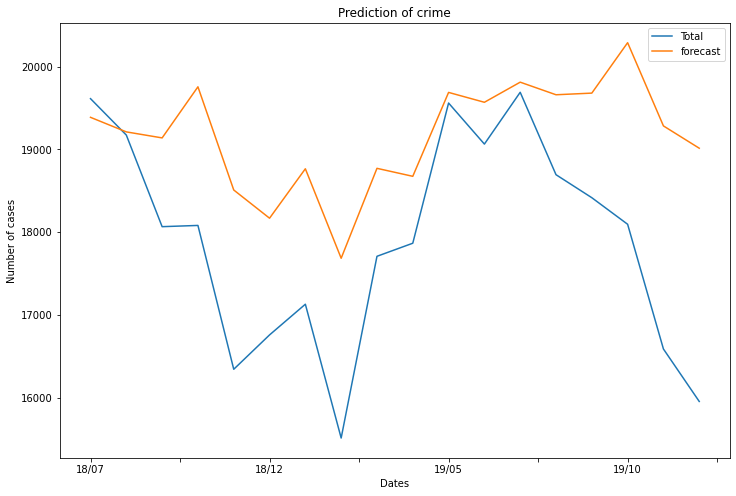

In [29]:
future_df = future_df[150:]
future_df[['Total', 'forecast']].plot(figsize=(12, 8))
plt.title('Prediction of crime')
plt.xlabel('Dates')
plt.ylabel('Number of cases')

